Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 4: Procjena parametara, probabilistički grafički modeli i grupiranje

*Verzija: 0.5  
Zadnji put ažurirano: 6. siječnja 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **18. siječnja 2021. u 06:00h**

------------------------------

### Upute

Četvrta laboratorijska vježba sastoji se od tri zadatka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [14]:
# Učitaj osnovne biblioteke...
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pgmpy as pgm
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [15]:
def plot_silhouette(n_clusters, X):
    # Kôd preuzet s http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = plt.cm.get_cmap("Dark2")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Vrijednosti koeficijenta siluete")
    ax1.set_ylabel("Oznaka grupe")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = plt.cm.get_cmap("Dark2")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=30, lw=0, alpha=1,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers # changed to black
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="black", alpha=1, s=100, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=80, edgecolor='k')

    ax2.set_xlabel(r"$x_1$")
    ax2.set_ylabel(r"$x_2$")

    plt.show()

### 1. Procjena maksimalne izglednosti i procjena maksimalne aposteriorne vjerojatnosti

#### (a)

Definirajte funkciju izglednosti $\mathcal{L}(\mu|\mathcal{D})$ za skup $\mathcal{D}=\{x^{(i)}\}_{i=1}^N$ Bernoullijevih varijabli. Neka od $N$ varijabli njih $m$ ima vrijednost 1 (npr. od $N$ bacanja novčića, $m$ puta smo dobili glavu). Definirajte funkciju izglednosti tako da je parametrizirana s $N$ i $m$, dakle definirajte funkciju $\mathcal{L}(\mu|N,m)$. 

#### (b)

In [16]:
def L(mu, N, m):
    # Vaš kôd ovdje...
    # funkcija izglednosti Bernoullijeve varijable
    P = N - m       # racunanje broja negativnih ishoda
    A = mu**m       # racunanje vjerojatnosti da se dogadaj dogodio m puta
    B = (1 - mu)**P # racunanje vjerojatnosti da se dogadaj nije dogodio N-m puta
    rez = A * B     # racunanje vjerojatnosti Bernoullijeve varijable 
    return rez
    

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za (1) $N=10$ i $m=1,2,5,9$ te za (2) $N=100$ i $m=1,10,50,90$ (dva zasebna grafikona).

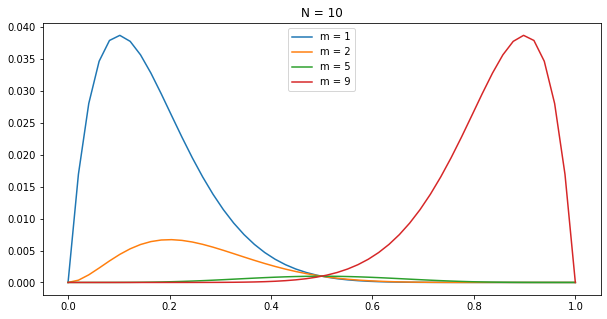

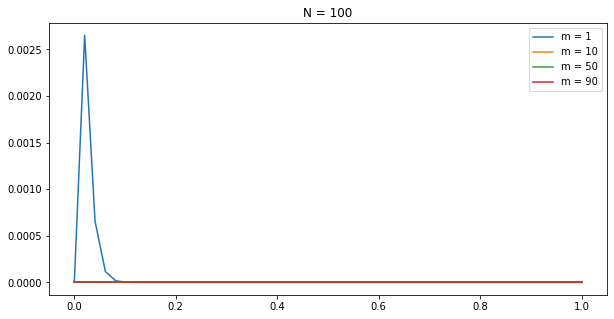

In [17]:
# Vaš kôd ovdje...

mu_1b = np.linspace(0, 1) # stvaranje skupa vrijednosti mu

N_1b_10 = 10 # definiranje broja slucajeva

m_1b_10 = [1, 2, 5, 9] # definiranje broja slucajeva s pozitivnnim ishodom

plt.figure(figsize = (10, 5)) # definiranje velicine slike
plt.title("N = 10") # postavljanje naslova slike

# iscrtavanje grafova za razne vrijednosti m
for i in range(len(m_1b_10)):
    plt.plot(mu_1b, L(mu_1b, N_1b_10, m_1b_10[i]) , label="m = {}".format(m_1b_10[i]))
plt.legend(loc="best")

N_1b_100 = 100 # definiranje broja slucajeva

m_1b_100 = [1, 10, 50, 90] # definiranje broja slucajeva s pozitivnnim ishodom

plt.figure(figsize = (10, 5)) # definiranje velicine slike
plt.title("N = 100") # postavljanje naslova slike

# iscrtavanje grafova za razne vrijednosti m
for i in range(len(m_1b_100)):
    plt.plot(mu_1b, L(mu_1b, N_1b_100, m_1b_100[i]) , label="m = {}".format(m_1b_100[i]))
plt.legend(loc="best")

print()

**Q:** Koja vrijednost odgovara ML-procjenama i zašto?

#### (c)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za $N=10$ i $m=\{0,9\}$.

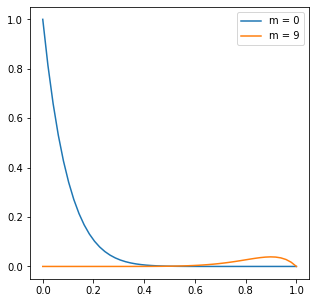

In [18]:
# Vaš kôd ovdje...

mu_1c = np.linspace(0, 1) # stvaranje skupa vrijednosti mu

N_1c_10 = 10 # definiranje broja slucajeva

m_1c_10 = [0, 9] # definiranje broja slucajeva s pozitivnnim ishodom

plt.figure(figsize = (5, 5)) # definiranje velicine slike

# iscrtavanje grafova za razne vrijednosti m
for i in range(len(m_1c_10)):
    plt.plot(mu_1c, L(mu_1c, N_1c_10, m_1c_10[i]) , label="m = {}".format(m_1c_10[i]))
plt.legend(loc="best")
print()

**Q:** Koja je ML-procjena za $\mu$ i što je problem s takvom procjenom u ovome slučaju?

#### (d)

Prikažite beta-distribuciju $B(\mu|\alpha,\beta)$ za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

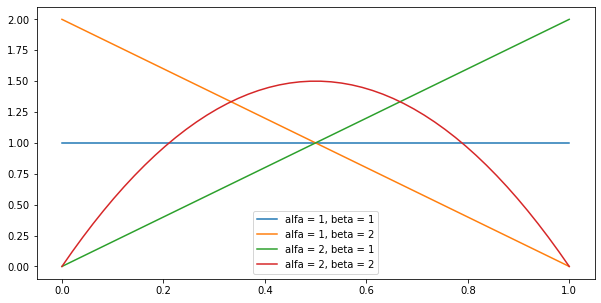

In [19]:
from scipy.stats import beta

# Vaš kôd ovdje...
mu_1d = np.linspace(0, 1) # stvaranje skupa vrijednosti mu

alfa_1d = [1, 2] # definiranje vrijednosti alfa
beta_1d = [1, 2] # definiranje vrijednosti beta

plt.figure(figsize = (10, 5)) # definiranje velicine slike

# iscrtavanje grafova za razne vrijednosti alfa i beta
for i in range(len(alfa_1d)):
    for j in range(len(beta_1d)):
        
        plt.plot(mu_1d, beta.pdf(mu_1d, alfa_1d[i], beta_1d[j]), 
        label="alfa = {}, beta = {}".format(alfa_1d[i], beta_1d[j]))
plt.legend(loc="best")
print()

**Q:** Koje parametere biste odabrali za modeliranje apriornog znanja o parametru $\mu$ za novčić za koji mislite da je "donekle pravedan, ali malo češće pada na glavu"? Koje biste parametre odabrali za novčić za koji držite da je posve pravedan? Zašto uopće koristimo beta-distribuciju, a ne neku drugu?

#### (e)

Definirajte funkciju za izračun zajedničke vjerojatnosti $P(\mu,\mathcal{D}) = P(\mathcal{D}|\mu) \cdot P(\mu|\alpha,\beta)$ te prikažite tu funkciju za $N=10$ i $m=9$ i nekolicinu kombinacija parametara $\alpha$ i $\beta$. 

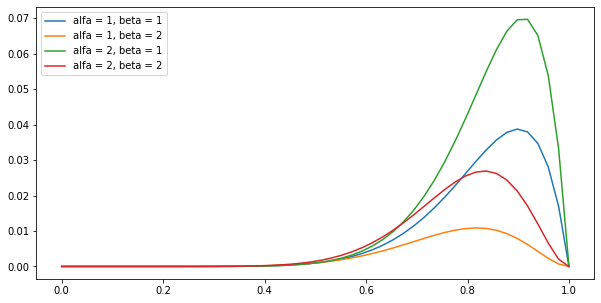

In [21]:
# Vaš kôd ovdje...
from scipy.stats import beta

# definiranje funkcije za izracun zajednickih vjerojatnosti P(mu, D)
def P_um_D(mu, alfa, betta, N, m):
    P_ab = beta.pdf(mu, alfa, betta) # izracun vrijednosti P(mu| alfa, beta)
    Like = L(mu, N, m) # izracun vrijednosti P(D|mu)
    result = P_ab * Like # izracun rezultata
    return result
    
mu_1e = np.linspace(0, 1) # stvaranje skupa vrijednosti mu

alfa_1e = [1, 2] # definiranje vrijednosti alfa
beta_1e = [1, 2] # definiranje vrijednosti beta

N_1e = 10 # definiranje broja slucajeva
m_1e = 9 # definiranje  broja slucajeva s pozitivnim ishodom

plt.figure(figsize = (10, 5)) # definiranje velicine slike

# iscrtavanje grafova za razne vrijednosti alfa i beta
for i in range(len(alfa_1e)):
    for j in range(len(beta_1e)):
        
        plt.plot(mu_1e, P_um_D(mu_1e, alfa_1e[i], beta_1e[j], N_1e, m_1e), 
        label="alfa = {}, beta = {}".format(alfa_1e[i], beta_1e[j]))
        
plt.legend(loc="best")
print()

**Q**: Koje vrijednosti odgovaraju MAP-procjeni za $\mu$? Usporedite ih sa ML-procjenama.

#### (f)

Za $N=10$ i $m=1$, na jednome grafikonu prikažite sve tri distribucije: $P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$.

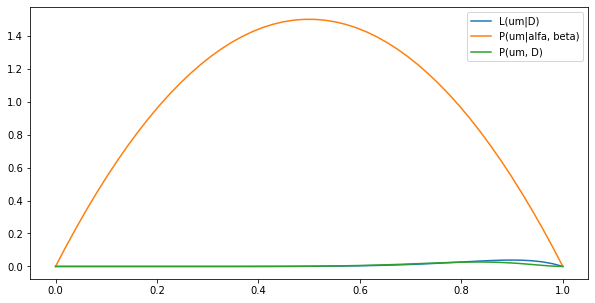

In [22]:
# Vaš kôd ovdje...

mu_1f = np.linspace(0, 1) # stvaranje skupa vrijednosti mu

alfa_1f = 2 # definiranje vrijednosti alfa
beta_1f = 2 # definiranje vrijednosti beta

N_1f = 10 # definiranje broja slucajeva
m_1f = 9 # definiranje  broja slucajeva s pozitivnim ishodom

plt.figure(figsize = (10, 5)) # definiranje velicine slike

# iscrtavanje grafa L(um|D)
plt.plot(mu_1f, L(mu_1f, N_1f, m_1f), label="L(um|D)")
# iscrtavanje grafa P(um|alfa, beta)
plt.plot(mu_1f, beta.pdf(mu_1f, alfa_1f, beta_1f), label="P(um|alfa, beta)")
# iscrtavanje grafa P(um, D)
plt.plot(mu_1f, P_um_D(mu_1f, alfa_1f, beta_1f, N_1f, m_1f), label="P(um, D)")

plt.legend(loc="best")
print()

#### (g)

Učitajte skup podataka *Iris* korištenjem funkcije [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Taj skup sadrži $n=4$ značajke i $K=3$ klase. Odaberite jednu klasu i odaberite sve primjere iz te klase, dok ostale primjere zanemarite (**u nastavku radite isključivo s primjerima iz te jedne klase**). Vizualizirajte podatke tako da načinite 2D-prikaze za svaki par značajki (šest grafikona; za prikaz je najjednostavnije koristiti funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)).

**NB:** Mogla bi Vam dobro dući funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

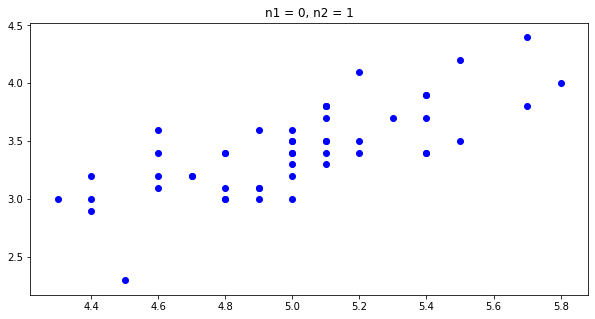

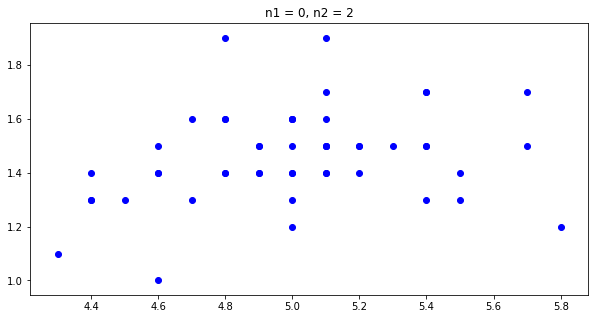

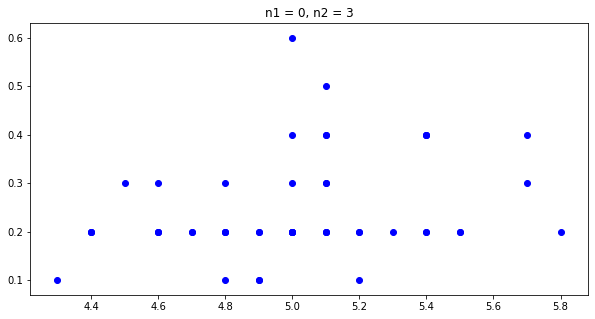

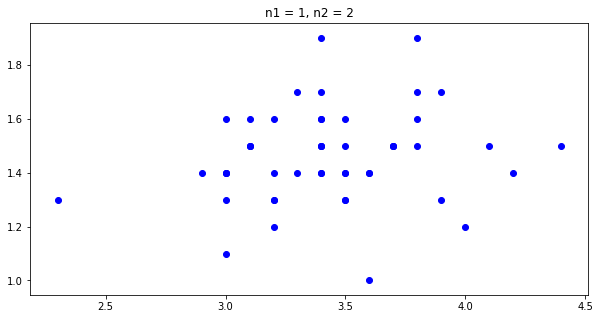

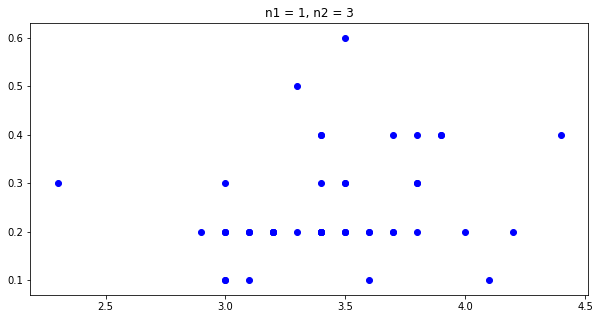

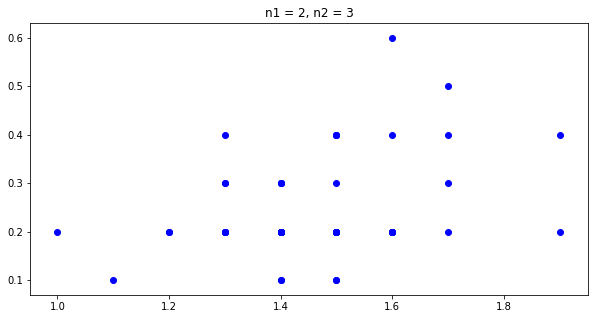

In [23]:
from sklearn.datasets import load_iris
import itertools as it

# Vaš kôd ovdje...
data_1g = load_iris(return_X_y=True) # preuzimanje podataka
iris_X_1g = data_1g[0] # deiniranje skupa X
iris_y_1g = data_1g[1] # deiniranje skupa y

iris_X_1g0 = [] # deiniranje skupa X_0 koji sadrzi sve elemente X kojima je y=0

# popunjavanje skupa X_0
for i in range(len(iris_X_1g)):
    if iris_y_1g[i] == 0:
        iris_X_1g0.append(iris_X_1g[i])

n_1g = 4 # definiranje broja znacajka
compinations_1g = it.combinations(range(n_1g), 2) # definiranje svih kombinacija n1 i n2

# iscrtavanje podatka za svaku kombinaciju n1 i n2
for n1, n2 in compinations_1g:
    plt.figure(figsize = (10, 5))  # definiranje velicine slike
    plt.title("n1 = {}, n2 = {}".format(n1, n2)) # postavljanje naslova slike
    for i in range(len(iris_X_1g0)):
        
        plt.scatter(iris_X_1g0[i][n1], iris_X_1g0[i][n2], color="blue")
        

#### (h)

Pogledajte opis modula [`stats`](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) te proučite funkciju [`norm`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm). Implementirajte funkciju log-izglednosti za parametre $\mu$ i $\sigma^2$ normalne distribucije.

In [24]:
from scipy.stats import norm

def L_gauss(x, mi, sigma):
    # Vaš kôd ovdje...
    N = len(x) # definiranje broja N
    A = -(N/2) * log(2*pi) # izracun A elementa
    B = - N * log(sqrt(sigma)) # izracun B elementa
    C = -1/(2*sigma) # izracuna C elementa
    suma = 0
    
    # izracun sume 
    for i in range(N):
        delta = x[i] - mi
        suma += delta**2
    
    result = A + B + C * suma # izracun krajnjeg rezultata 
    return result

#### (i)
Izračunajte ML-procjene za $(\mu, \sigma^2)$ za svaku od $n=4$ značajki iz skupa *Iris*. Ispišite log-izglednosti tih ML-procjena. 

In [25]:
# Vaš kôd ovdje...

data_1i = load_iris(return_X_y=True) # preuzimanje podataka
iris_X_1i = data_1i[0] # deiniranje skupa X
iris_y_1i = data_1i[1] # deiniranje skupa y
iris_X_1i0 = [] # deiniranje skupa X_0 koji sadrzi sve elemente X kojima je y=0

# popunjavanje skupa X_0
for i in range(len(iris_X_1i)):
    if iris_y_1i[i] == 0:
        iris_X_1i0.append(iris_X_1i[i])


X_n1_1i = [] # deiniranje skupa X sa vrijedsnotima prve znacajke
X_n2_1i = [] # deiniranje skupa X sa vrijedsnotima druge znacajke
X_n3_1i = [] # deiniranje skupa X sa vrijedsnotima trece znacajke
X_n4_1i = [] # deiniranje skupa X sa vrijedsnotima cetvrte znacajke


for i in range(len(iris_X_1i0)):
    X_n1_1i.append(iris_X_1i0[i][0]) # popunjavanje skupa X sa vrijedsnotima prve znacajke 
    X_n2_1i.append(iris_X_1i0[i][1]) # popunjavanje skupa X sa vrijedsnotima prve znacajke
    X_n3_1i.append(iris_X_1i0[i][2]) # popunjavanje skupa X sa vrijedsnotima prve znacajke
    X_n4_1i.append(iris_X_1i0[i][3]) # popunjavanje skupa X sa vrijedsnotima prve znacajke

##########################################################################

print("n = 1") # ispis koji oznacuje broj znacajke
mean_n1_1i = np.mean(X_n1_1i) # izracun srednje vrijednosti skupa X za n=1 znacakju
var_n1_1i = np.var(X_n1_1i) # izracun varijacije skupa X za n=1 znacakju
like_n1_1i = L_gauss(X_n1_1i, mean_n1_1i, var_n1_1i) # izracun log izglednosti skupa X za n=1 znacakju

print("Log izglednost: {}".format(like_n1_1i)) # ispis log izglednosti za skup X za n=1 znacakju
print()
##########################################################################

print("n = 2") # ispis koji oznacuje broj znacajke
mean_n2_1i = np.mean(X_n2_1i) # izracun srednje vrijednosti skupa X za n=2 znacakju
var_n2_1i = np.var(X_n2_1i) # izracun varijacije skupa X za n=2 znacakju
like_n2_1i = L_gauss(X_n2_1i, mean_n2_1i, var_n2_1i) # izracun log izglednosti skupa X za n=2 znacakju

print("Log izglednost: {}".format(like_n2_1i)) # ispis log izglednosti za skup X za n=2 znacakju
print()
##########################################################################

print("n = 3") # ispis koji oznacuje broj znacajke
mean_n3_1i = np.mean(X_n3_1i) # izracun srednje vrijednosti skupa X za n=3 znacakju
var_n3_1i = np.var(X_n3_1i) # izracun varijacije skupa X za n=3 znacakju
like_n3_1i = L_gauss(X_n3_1i, mean_n3_1i, var_n3_1i) # izracun log izglednosti skupa X za n=3 znacakju

print("Log izglednost: {}".format(like_n3_1i)) # ispis log izglednosti za skup X za n=3 znacakju
print()
##########################################################################

print("n = 4") # ispis koji oznacuje broj znacajke
mean_n4_1i = np.mean(X_n4_1i) # izracun srednje vrijednosti skupa X za n=4 znacakju
var_n4_1i = np.var(X_n4_1i) # izracun varijacije skupa X za n=4 znacakju
like_n4_1i = L_gauss(X_n4_1i, mean_n4_1i, var_n4_1i) # izracun log izglednosti skupa X za n=4 znacakju

print("Log izglednost: {}".format(like_n4_1i)) # ispis log izglednosti za skup X za n=4 znacakju
print()

n = 1
Log izglednost: -18.30516331280386

n = 2
Log izglednost: -21.939396526466616

n = 3
Log izglednost: 17.08978609115975

n = 4
Log izglednost: 42.06460979129478



#### (j)

Proučite funkciju [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) za izračun Pearsonovog koeficijenta korelacije. Izračunajte koeficijente korelacije između svih četiri značajki u skupu *Iris*. 

In [28]:
from scipy.stats import pearsonr

# Vaš kôd ovdje...
data_1j = load_iris(return_X_y=True) # preuzimanje podataka
iris_X_1j = data_1j[0] # deiniranje skupa X
iris_y_1j = data_1j[1] # deiniranje skupa y

iris_X_1j0 = [] # deiniranje skupa X_0 koji sadrzi sve elemente X kojima je y=0

# popunjavanje skupa X_0
for i in range(len(iris_X_1j)):
    if iris_y_1j[i] == 0:
        iris_X_1j0.append(iris_X_1j[i])

n_1j = 4 # definiranje broja znacajka     
compinations_1j = it.combinations(range(n_1j), 2) # definiranje svih kombinacija n1 i n2

# iscrtavanje podatka za svaku kombinaciju n1 i n2
for n1, n2 in compinations_1j:
    X_n1_1j = [] # deiniranje skupa X sa vrijedsnotima n1 znacajke 
    X_n2_1j = [] # deiniranje skupa X sa vrijedsnotima n2 znacajke 
    for i in range(len(iris_X_1j0)):
        X_n1_1j.append(iris_X_1j0[i][n1]) # popunjavanje skupa X sa vrijedsnotima n1 znacajke 
        X_n2_1j.append(iris_X_1j0[i][n2]) # popunjavanje skupa X sa vrijedsnotima n2 znacajke
    print("n1 = {}, n2 = {}".format(n1, n2)) # ispis kombinacije n1 i n2
    pear = pearsonr(X_n1_1j, X_n2_1j)[0] # izracun korelacije
    print("Korelacija: {}".format(pear)) # ispis razultata korelacije

n1 = 0, n2 = 1
Korelacija: 0.7425466856651598
n1 = 0, n2 = 2
Korelacija: 0.26717575886875716
n1 = 0, n2 = 3
Korelacija: 0.27809835293596963
n1 = 1, n2 = 2
Korelacija: 0.17769996678227076
n1 = 1, n2 = 3
Korelacija: 0.2327520113628794
n1 = 2, n2 = 3
Korelacija: 0.33163004080411873


#### (k)

Proučite funkciju [`cov`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) te izračunajte ML-procjenu za kovarijacijsku matricu za skup *Iris*. Usporedite pristranu i nepristranu procjenu. Pokažite da se razlika (srednja apsolutna i kvadratna) smanjuje s brojem primjera (npr. isprobajte za $N/4$ i $N/2$ i $N$ primjera).

In [30]:
# Vaš kôd ovdje...

data_1k = load_iris(return_X_y=True) # preuzimanje podataka
iris_X_1k = data_1k[0] # deiniranje skupa X
iris_y_1k = data_1k[1] # deiniranje skupa y

iris_X_1k0 = [] # deiniranje skupa X_0 koji sadrzi sve elemente X kojima je y=0

# popunjavanje skupa X_0
for i in range(len(iris_X_1k)):
    if iris_y_1k[i] == 0:
        iris_X_1k0.append(iris_X_1k[i])

############################################################################

N_1k = len(iris_X_1k0) # definiranje broja elemenata skupa X

pr_not_bias_1k = np.cov(iris_X_1k0, rowvar=False, bias=False) # izracun nepristrane procjene
pr_bias_1k = np.cov(iris_X_1k0, rowvar=False, bias=True) # izracun pristrane procjene

abs_dif_pr_1k = abs(pr_not_bias_1k - pr_bias_1k) # izracun apsolutne razlike
kvad_dif_pr_1k = (pr_not_bias_1k - pr_bias_1k)**2 # izracun kvadratne razlike

mean_abs_1k = np.mean(abs_dif_pr_1k) # izracun srednje vrijednosti apsolutne razlike
mean_kvad_1k = np.mean(kvad_dif_pr_1k) # izracun srednje vrijednosti kvadratne razlike

print("N = {}".format(N_1k)) # ispis broja elementa skupa X
print("Srednja absolutna razlika: {}".format(mean_abs_1k)) # ispis srednje vrijednosti apsolutne razlike
print("Kvadratna razlika: {}".format(mean_kvad_1k)) # ispis srednje vrijednosti kvadratne razlike
#############################################################################

N_1k_2 = round(N_1k/2) # definiranje broja elemenata skupa X

iris_X_1k0_2 = [] # definiranje skupa X_2 koji sadrzi N/2 elemenata 

# popunjavanje skupa X_2
for i in range(N_1k_2):
    iris_X_1k0_2.append(iris_X_1k0[i])
    
pr_not_bias_1k_2 = np.cov(iris_X_1k0_2, rowvar=False, bias=False) # izracun nepristrane procjene
pr_bias_1k_2 = np.cov(iris_X_1k0_2, rowvar=False, bias=True) # izracun pristrane procjene

abs_dif_pr_1k_2 = abs(pr_not_bias_1k_2 - pr_bias_1k_2) # izracun apsolutne razlike
kvad_dif_pr_1k_2 = (pr_not_bias_1k_2 - pr_bias_1k_2)**2 # izracun kvadratne razlike

mean_abs_1k_2 = np.mean(abs_dif_pr_1k_2) # izracun srednje vrijednosti apsolutne razlike
mean_kvad_1k_2 = np.mean(kvad_dif_pr_1k_2) # izracun srednje vrijednosti kvadratne razlike

print("N = {}".format(N_1k_2)) # ispis broja elementa skupa X
print("Srednja absolutna razlika: {}".format(mean_abs_1k_2)) # ispis srednje vrijednosti apsolutne razlike
print("Kvadratna razlika: {}".format(mean_kvad_1k_2)) # ispis srednje vrijednosti kvadratne razlike
#############################################################################

N_1k_4 = round(N_1k/4) # definiranje broja elemenata skupa X

iris_X_1k0_4 = [] # definiranje skupa X_4 koji sadrzi N/4 elemenata 

# popunjavanje skupa X_4
for i in range(N_1k_4):
    iris_X_1k0_4.append(iris_X_1k0[i])
    
pr_not_bias_1k_4 = np.cov(iris_X_1k0_4, rowvar=False, bias=False) # izracun nepristrane procjene
pr_bias_1k_4 = np.cov(iris_X_1k0_4, rowvar=False, bias=True) # izracun pristrane procjene

abs_dif_pr_1k_4 = abs(pr_not_bias_1k_4 - pr_bias_1k_4) # izracun apsolutne razlike
kvad_dif_pr_1k_4 = (pr_not_bias_1k_4 - pr_bias_1k_4)**2 # izracun kvadratne razlike

mean_abs_1k_4 = np.mean(abs_dif_pr_1k_4) # izracun srednje vrijednosti apsolutne razlike
mean_kvad_1k_4 = np.mean(kvad_dif_pr_1k_4) # izracun srednje vrijednosti kvadratne razlike

print("N = {}".format(N_1k_4)) # ispis broja elementa skupa X
print("Srednja absolutna razlika: {}".format(mean_abs_1k_4)) # ispis srednje vrijednosti apsolutne razlike
print("Kvadratna razlika: {}".format(mean_kvad_1k_4)) # ispis srednje vrijednosti kvadratne razlike
#############################################################################

N = 50
Srednja absolutna razlika: 0.0007689234693877489
Kvadratna razlika: 1.4518483236151334e-06
N = 25
Srednja absolutna razlika: 0.0018493333333333307
Kvadratna razlika: 7.680071499999976e-06
N = 12
Srednja absolutna razlika: 0.0023989898989899023
Kvadratna razlika: 1.293849160799922e-05


### 2. Probabilistički grafički modeli -- Bayesove mreže

Ovaj zadatak bavit će se Bayesovim mrežama, jednim od poznatijih probabilističkih grafičkih modela (*probabilistic graphical models*; PGM). Za lakše eksperimentiranje koristit ćemo programski paket [`pgmpy`](https://github.com/pgmpy/pgmpy). Molimo Vas da provjerite imate li ovaj paket te da ga instalirate ako ga nemate. Upute se nalaze na gornjoj poveznici. Za korisnike Anaconde, najlakše je upisati `conda install -c ankurankan pgmpy` (ili `pip install pgmpy` ako ne prolazi) unutar Anaconda Prompta (i ponovno pokrenuti Jupyter).

#### (a)  
Prvo ćemo pogledati udžbenički primjer s prskalicom. U ovom primjeru razmatramo Bayesovu mrežu koja modelira zavisnosti između oblačnosti (slučajna varijabla $C$), kiše ($R$), prskalice ($S$) i mokre trave ($W$). U ovom primjeru također pretpostavljamo da već imamo parametre vjerojatnosnih distribucija svih čvorova. Ova mreža prikazana je na sljedećoj slici:

![This](http://www.fer.unizg.hr/_download/repository/bayes-net-sprinkler.jpg)

Koristeći paket `pgmpy`, konstruirajte Bayesovu mrežu iz gornjeg primjera. Zatim, koristeći **egzaktno** zaključivanje, postavite sljedeće posteriorne upite: $P(w=1)$, $P(s=1|w=1)$, $P(r=1|w=1)$, $P(c=1|s=1, r=1)$ i $P(c=1)$. Provedite zaključivanje na papiru i uvjerite se da ste ispravno konstruirali mrežu. Pomoći će vam službena dokumentacija te primjeri korištenja (npr. [ovaj](https://github.com/pgmpy/pgmpy/blob/dev/examples/Monty%20Hall%20Problem.ipynb)).

In [31]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination

In [32]:
# Vaš kôd ovdje...

model_2a = BayesianModel([('C', 'S'), ('C', 'R'), ('S', 'W'), ('R', 'W')]) # definiranje Bayesian Modela

P_c_2a = 0.5 # definiranje vrijednsoti P(C)

P_s_2a_T = 0.1 # definiranje vrijednsoti P(S) za C=T
P_s_2a_F = 0.5 # definiranje vrijednsoti P(S) za C=F

P_r_2a_T = 0.8 # definiranje vrijednsoti P(R) za C=T
P_r_2a_F = 0.2 # definiranje vrijednsoti P(R) za C=F

P_w_2a_TT = 0.99 # definiranje vrijednsoti P(W) za S=T i R=T
P_w_2a_FT = 0.90 # definiranje vrijednsoti P(W) za S=T i R=F
P_w_2a_TF = 0.9 # definiranje vrijednsoti P(W) za S=F i R=T
P_w_2a_FF = 0.0 # definiranje vrijednsoti P(W) za S=F i R=F

# definiranje CPD za C
cpd_C_2a = TabularCPD('C', 2, [[P_c_2a], [1-P_c_2a]]) 

# definiranje CPD za R
cpd_R_2a = TabularCPD('R', 2, [[1-P_r_2a_F, 1-P_r_2a_T], [P_r_2a_F, P_r_2a_T]], evidence=['C'], evidence_card=[2])

# definiranje CPD za S
cpd_S_2a = TabularCPD('S', 2, [[1-P_s_2a_F, 1-P_s_2a_T], [P_s_2a_F, P_s_2a_T]], evidence=['C'], evidence_card=[2])

# definiranje CPD za W
cpd_W_2a = TabularCPD('W', 2, [[1-P_w_2a_FF, 1-P_w_2a_FT, 1-P_w_2a_TF, 1-P_w_2a_TT], 
                               [P_w_2a_FF, P_w_2a_FT, P_w_2a_TF, P_w_2a_TT]], 
                              evidence=['S', 'R'], evidence_card=[2, 2])

#pridruzivanje CPD-a s Bayesianovim modelom
model_2a.add_cpds(cpd_C_2a, cpd_R_2a, cpd_S_2a, cpd_W_2a)

model_2a.get_cpds()

model_2a.check_model()

infer = VariableElimination(model_2a)


# P(w=1)
print("P(w=1)") # ispis zeljene vrijednosti
posterior_W1_2a = infer.query(['W']) # izracun zeljenog posteriornog upita
print(posterior_W1_2a) # ispis vrijednosti 
print()
##################################################################################################

# P(s=1|w=1)
print("P(s=1|w=1)") # ispis zeljene vrijednosti
posterior_S1_W1_2a = infer.query(['S'], evidence={'W': 1}) # izracun zeljenog posteriornog upita
print(posterior_S1_W1_2a) # ispis vrijednosti 
print()
##################################################################################################

# P(r=1|w=1)
print("P(r=1|w=1)") # ispis zeljene vrijednosti
posterior_R1_W1_2a = infer.query(['R'], evidence={'W': 1}) # izracun zeljenog posteriornog upita
print(posterior_R1_W1_2a) # ispis vrijednosti 
print()
##################################################################################################

# P(c=1|s=1, r=1)
print("P(c=1|s=1, r=1)") # ispis zeljene vrijednosti
posterior_C1_S1_R1_2a = infer.query(['C'], evidence={'S': 1, 'R': 1}) # izracun zeljenog posteriornog upita
print(posterior_C1_S1_R1_2a) # ispis vrijednosti 
print()
##################################################################################################

# P(c=1)
print("P(c=1)") # ispis zeljene vrijednosti
posterior_C1_2a = infer.query(['C']) # izracun zeljenog posteriornog upita
print(posterior_C1_2a) # ispis vrijednosti 
print()
##################################################################################################

P(w=1)
+------+----------+
| W    |   phi(W) |
+======+==========+
| W(0) |   0.3529 |
+------+----------+
| W(1) |   0.6471 |
+------+----------+

P(s=1|w=1)
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.5702 |
+------+----------+
| S(1) |   0.4298 |
+------+----------+

P(r=1|w=1)
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.2921 |
+------+----------+
| R(1) |   0.7079 |
+------+----------+

P(c=1|s=1, r=1)
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5556 |
+------+----------+
| C(1) |   0.4444 |
+------+----------+

P(c=1)
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+



C:\Python\Python37\lib\site-packages\pgmpy\models\BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


**Q:** Koju zajedničku vjerojatnosnu razdiobu ova mreža modelira? Kako tu informaciju očitati iz mreže?  
**Q:** U zadatku koristimo egzaktno zaključivanje. Kako ono radi?  
**Q:** Koja je razlika između posteriornog upita i MAP-upita?  
**Q:** Zašto je vjerojatnost $P(c=1)$ drugačija od $P(c=1|s=1,r=1)$ ako znamo da čvorovi $S$ i $R$ nisu roditelji čvora $C$?

#### (b)  
**Efekt objašnjavanja** (engl. *explaining away*) zanimljiv je fenomen u kojem se događa da se dvije varijable "natječu" za objašnjavanje treće. Ovaj fenomen može se primijetiti na gornjoj mreži. U tom se slučaju varijable prskalice ($S$) i kiše ($R$) "natječu" za objašnjavanje mokre trave ($W$). Vaš zadatak je pokazati da se fenomen zaista događa.

In [33]:
# Vaš kôd ovdje...

# P(s=1|w=1)
print("P(s=1|w=1)") # ispis zeljene vrijednosti
posterior_S1_W1_2a = infer.query(['S'], evidence={'W' : 1}) # izracun zeljenog posteriornog upita
print(posterior_S1_W1_2a) # ispis vrijednosti 
print()
##################################################################################################

# P(s=1|w=1, r=1)
print("P(s=1|w=1, r=1)") # ispis zeljene vrijednosti
posterior_S1_W1_R1_2a = infer.query(['S'], evidence={'W': 1, 'R': 1}) # izracun zeljenog posteriornog upita
print(posterior_S1_W1_R1_2a) # ispis vrijednosti 
print()
##################################################################################################

# P(r=1|w=1)
print("P(r=1|w=1)") # ispis zeljene vrijednosti
posterior_R1_W1_2a = infer.query(['R'], evidence={'W' : 1}) # izracun zeljenog posteriornog upita
print(posterior_R1_W1_2a) # ispis vrijednosti 
print()
##################################################################################################

# P(r=1|w=1, r=1)
print("P(r=1|w=1, s=1)") # ispis zeljene vrijednosti
posterior_R1_W1_S1_2a = infer.query(['R'], evidence={'W': 1, 'S': 1}) # izracun zeljenog posteriornog upita
print(posterior_R1_W1_S1_2a) # ispis vrijednosti 
print()
##################################################################################################

P(s=1|w=1)
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.5702 |
+------+----------+
| S(1) |   0.4298 |
+------+----------+

P(s=1|w=1, r=1)
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8055 |
+------+----------+
| S(1) |   0.1945 |
+------+----------+

P(r=1|w=1)
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.2921 |
+------+----------+
| R(1) |   0.7079 |
+------+----------+

P(r=1|w=1, s=1)
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.6796 |
+------+----------+
| R(1) |   0.3204 |
+------+----------+



**Q:** Kako biste svojim riječima opisali ovaj fenomen, koristeći se ovim primjerom?

### 3. Grupiranje

U ovom zadatku ćete se upoznati s algoritmom k-sredina (engl. *k-means*), njegovim glavnim nedostatcima te pretpostavkama. Također ćete isprobati i drugi algoritam grupiranja: model Gaussovih mješavina (engl. *Gaussian mixture model*).

#### (a)  
Jedan od nedostataka algoritma k-sredina jest taj što unaprijed zahtjeva broj grupa ($K$) u koje će grupirati podatke. Ta informacija nam često nije dostupna (kao što nam nisu dostupne ni oznake primjera) te je stoga potrebno nekako izabrati najbolju vrijednost hiperparametra $K$. Jedan od naivnijih pristupa jest **metoda lakta/koljena** (engl. *elbow method*) koju ćete isprobati u ovom zadatku.

U svojim rješenjima koristite ugrađenu implementaciju algoritma k-sredina, dostupnoj u razredu [`cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

**NB**: Kriterijska funkcija algoritma k-sredina još se i naziva **inercijom** (engl. *inertia*). Za naučeni model, vrijednost kriterijske funkcije $J$ dostupna je kroz razredni atribut `inertia_`.

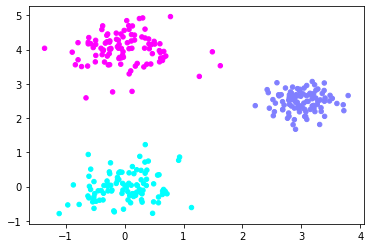

In [36]:
from sklearn.datasets import make_blobs

Xp, yp = make_blobs(n_samples=300, n_features=2, centers=[[0, 0], [3, 2.5], [0, 4]], 
                    cluster_std=[0.45, 0.3, 0.45], random_state=96)
plt.scatter(Xp[:,0], Xp[:,1], c=yp, cmap=plt.get_cmap("cool"), s=20)

Iskoristite skup podataka `Xp` dan gore. Isprobajte vrijednosti hiperparametra $K$ iz $[0,1,\ldots,15]$. Ne trebate dirati nikakve hiperparametre modela osim $K$. Iscrtajte krivulju od $J$ u ovisnosti o broju grupa $K$. Metodom lakta/koljena odredite vrijednost hiperparametra $K$.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1525.0284167293833, 666.7246505770144, 96.50741597612277, 81.3189974732791, 67.4394964660359, 59.50733647457682, 50.673620002522874, 45.13204762884182, 40.79183312314548, 36.37930057925243, 34.215275847638935, 30.38376081321077, 28.09847980605093, 25.8820168433475, 24.856489095326893]



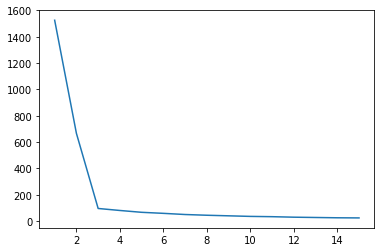

In [37]:
from sklearn.cluster import KMeans

# Vaš kôd ovdje...

K_3a = [] # definiranje skupa vrijednosti hiperparametra k

for i in range(15):
    K_3a.append(i+1)
    
print(K_3a)

J_3a = [] # definiranje skupa vrijednosti J

for i in range(len(K_3a)):
    model_3a = KMeans(n_clusters=K_3a[i]) # definiranje modela s odredenim hiperparametrom k
    model_3a.fit(Xp, yp) # treniranje modela s skupum Xp i yp
    j_3a = model_3a.inertia_ # preuzimanje podatka inertia
    J_3a.append(j_3a) # upis podatka inertia u skup

print(J_3a) # ispis skupa J
plt.plot(K_3a, J_3a) # iscrtavanje grafa skupa J
print()

**Q:** Koju biste vrijednost hiperparametra $K$ izabrali na temelju ovog grafa? Zašto? Je li taj odabir optimalan? Kako to znate?    
**Q:** Je li ova metoda robusna?  
**Q:** Možemo li izabrati onaj $K$ koji minimizira pogrešku $J$? Objasnite.

#### (b)  
Odabir vrijednosti hiperparametra $K$ može se obaviti na mnoštvo načina. Pored metode lakta/koljena, moguće je isto ostvariti i analizom siluete (engl. *silhouette analysis*). Za to smo pripremili funkciju `plot_silhouette` koja za dani broj grupa i podatke iscrtava prosječnu vrijednost koeficijenta siluete i vrijednost koeficijenta svakog primjera (kroz grupe). 

Vaš je zadatak isprobati različite vrijednosti hiperparametra $K$, $K \in \{2, 3, 5\}$ i na temelju dobivenih grafova odlučiti se za optimalan $K$.

For n_clusters = 2 The average silhouette_score is : 0.59280796169837


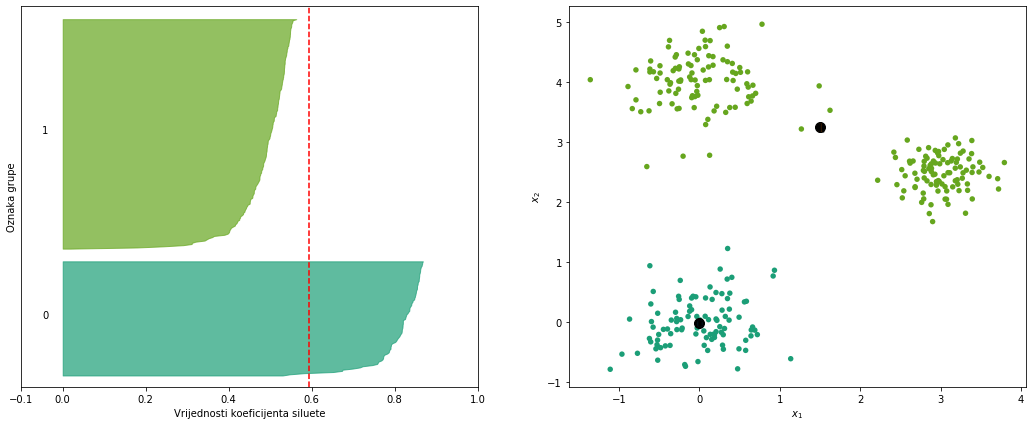

For n_clusters = 3 The average silhouette_score is : 0.7975462212061405


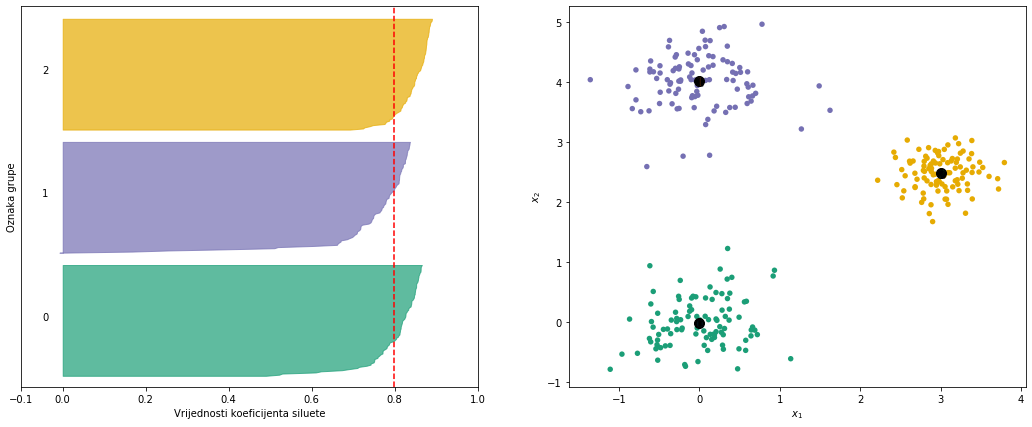

For n_clusters = 5 The average silhouette_score is : 0.5059026123508755


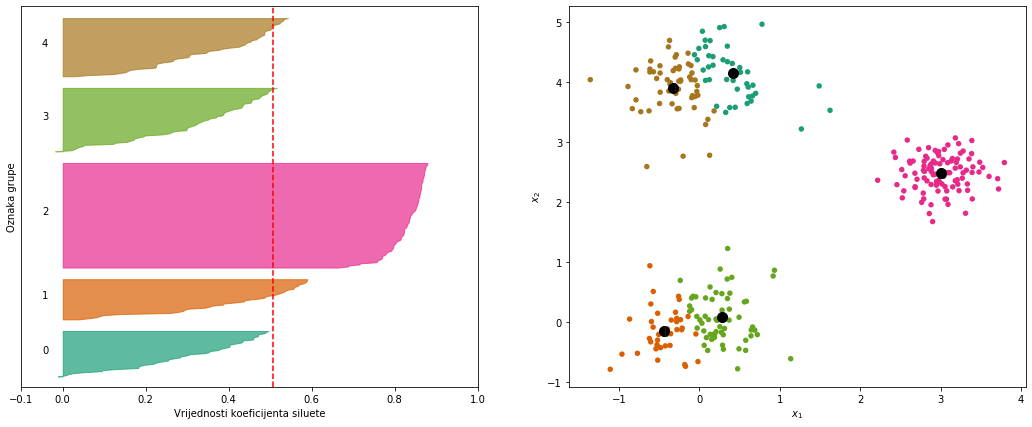

In [38]:
# Vaš kôd ovdje...

K_3b = [2, 3, 5] # definiranje skupa vrijednosti hiperparametra k

# iscrtavanje grafova za pojedni k
for i in range(len(K_3b)):
    plot_silhouette(K_3b[i], Xp)


**Q:** Kako biste se gledajući ove slike odlučili za $K$?  
**Q:** Koji su problemi ovog pristupa?

#### (c)  
U ovom i sljedećim podzadatcima fokusirat ćemo se na temeljne pretpostavke algoritma k-sredina te što se događa ako te pretpostavke nisu zadovoljene. Dodatno, isprobat ćemo i grupiranje modelom Gaussovih mješavina (engl. *Gaussian Mixture Models*; GMM) koji ne nema neke od tih pretpostavki.

Prvo, krenite od podataka `X1`, koji su generirani korištenjem funkcije [`datasets.make_blobs`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), koja stvara grupe podataka pomoću izotropskih Gaussovih distribucija.

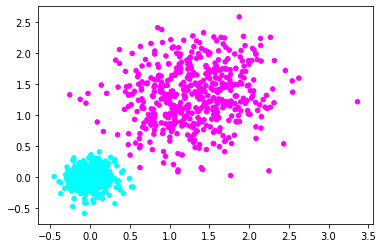

In [39]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0], [1.3, 1.3]], cluster_std=[0.15, 0.5], random_state=96)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.get_cmap("cool"), s=20)

Naučite model k-sredina (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

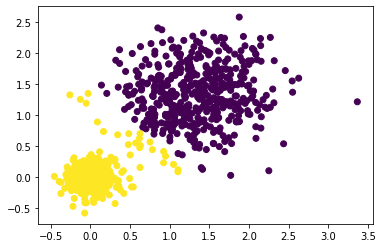

In [40]:
# Vaš kôd ovdje...
K_3c = 2 # definiranje vrijednosti hiperparametra k
model_3c = KMeans(n_clusters=K_3c) # definiranje modela s hiperparametrom k
model_3c.fit(X1, y1) # treniranje modela s skupum X1 i y1

X1_0_3c = [] # definiranje skupa koji sadrzava prve vrijendosti skupa X 
X1_1_3c = [] # definiranje skupa koji sadrzava druge vrijendosti skupa X

#popunjavanje skupova
for i in range(len(X1)):
    X1_0_3c.append(X1[i][0])
    X1_1_3c.append(X1[i][1])

# ispisvanje podataka oznacenih s odredenom bojom
scatter(X1_0_3c, X1_1_3c, c=model_3c.predict(X1))
print()

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (d)

Isprobajte algoritam k-sredina na podatcima generiranim korištenjem funkcije [`datasets.make_circles`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), koja stvara dvije grupe podataka tako da je jedna unutar druge.

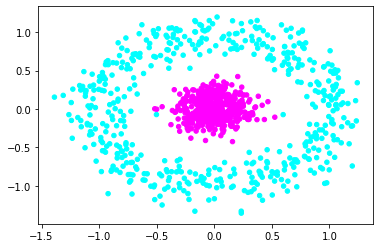

In [41]:
from sklearn.datasets import make_circles

X2, y2 = make_circles(n_samples=1000, noise=0.15, factor=0.05, random_state=96)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=plt.get_cmap("cool"), s=20)

Ponovno, naučite model k-sredina (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

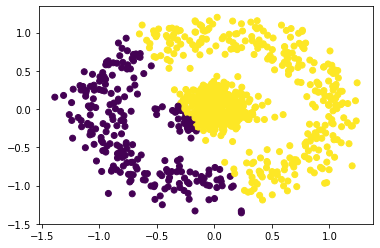

In [42]:
# Vaš kôd ovdje...

K_3d = 2 # definiranje vrijednosti hiperparametra k
model_3d = KMeans(n_clusters=K_3d) # definiranje modela s hiperparametrom k
model_3d.fit(X2, y2) # treniranje modela s skupum X2 i y2

X2_0_3d = [] # definiranje skupa koji sadrzava prve vrijendosti skupa X 
X2_1_3d = [] # definiranje skupa koji sadrzava druge vrijendosti skupa X

#popunjavanje skupova
for i in range(len(X2)):
    X2_0_3d.append(X2[i][0])
    X2_1_3d.append(X2[i][1])

# ispisvanje podataka oznacenih s odredenom bojom
scatter(X2_0_3d, X2_1_3d, c=model_3d.predict(X2))
print()

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (e)  
Završno, isprobat ćemo algoritam na sljedećem umjetno stvorenom skupu podataka:

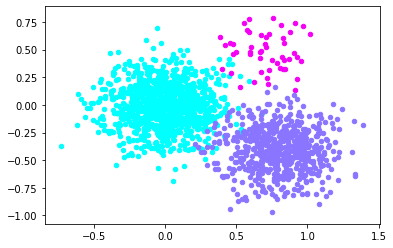

In [43]:
X31, y31 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0]], cluster_std=[0.2], random_state=69)
X32, y32 = make_blobs(n_samples=50, n_features=2, centers=[[0.7, 0.5]], cluster_std=[0.15], random_state=69)
X33, y33 = make_blobs(n_samples=600, n_features=2, centers=[[0.8, -0.4]], cluster_std=[0.2], random_state=69)
plt.scatter(X31[:,0], X31[:,1], c="#00FFFF", s=20)
plt.scatter(X32[:,0], X32[:,1], c="#F400F4", s=20)
plt.scatter(X33[:,0], X33[:,1], c="#8975FF", s=20)

# Just join all the groups in a single X.
X3 = np.vstack([X31, X32, X33])
y3 = np.hstack([y31, y32, y33])

Ponovno, naučite model k-sredina (ovaj put idealno pretpostavljajući $K=3$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

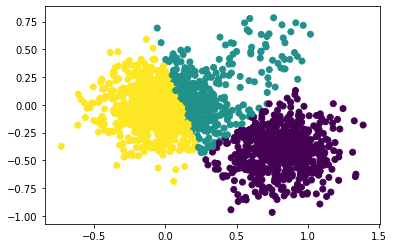

In [44]:
# Vaš kôd ovdje...
K_3e = 3 # definiranje vrijednosti hiperparametra k
model_3e = KMeans(n_clusters=K_3e) # definiranje modela s hiperparametrom k
model_3e.fit(X3, y3) # treniranje modela s skupum X3 i y3

X3_0_3e = [] # definiranje skupa koji sadrzava prve vrijendosti skupa X 
X3_1_3e = [] # definiranje skupa koji sadrzava druge vrijendosti skupa X

#popunjavanje skupova
for i in range(len(X3)):
    X3_0_3e.append(X3[i][0])
    X3_1_3e.append(X3[i][1])

# ispisvanje podataka oznacenih s odredenom bojom
scatter(X3_0_3e, X3_1_3e, c=model_3e.predict(X3))
print()

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (f)  
Sada kada ste se upoznali s ograničenjima algoritma k-sredina, isprobat ćete grupiranje modelom mješavine Gaussa (*Gaussian Mixture Models; GMM*), koji je generalizacija algoritma k-sredina (odnosno, algoritam k-sredina specijalizacija je GMM-a). Implementacija ovog modela dostupna je u [`mixture.GaussianMixture`](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html). Isprobajte ovaj model (s istim pretpostavkama o broju grupa) na podacima iz podzadataka (c)-(e). Ne morate mijenjati nikakve hiperparametre ni postavke osim broja komponenti.

In [45]:
from sklearn.mixture import GaussianMixture

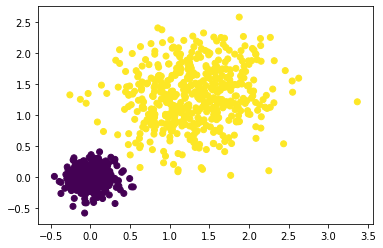

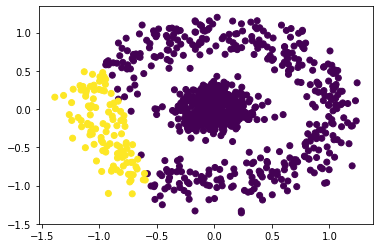

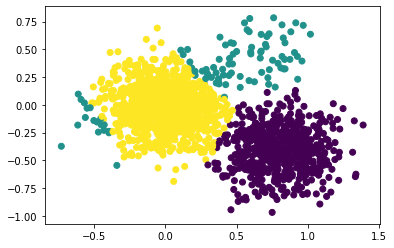

In [46]:
# Vaš kôd ovdje...

gm_3f_1 = GaussianMixture(n_components=K_3c) # definiranje modela s hiperparametrom k
gm_3f_1.fit(X1, y1) # treniranje modela s skupum X1 i y1

plt.figure(figsize = (6, 4))  # definiranje velicine slike
scatter(X1_0_3c, X1_1_3c, c=gm_3f_1.predict(X1)) # ispisvanje podataka oznacenih s odredenom bojom
####################################################################################################################

gm_3f_2 = GaussianMixture(n_components=K_3d) # definiranje modela s hiperparametrom k
gm_3f_2.fit(X2, y2) # treniranje modela s skupum X2 i y2

plt.figure(figsize = (6, 4))  # definiranje velicine slike
scatter(X2_0_3d, X2_1_3d, c=gm_3f_2.predict(X2)) # ispisvanje podataka oznacenih s odredenom bojom
####################################################################################################################

gm_3f_3 = GaussianMixture(n_components=K_3e) # definiranje modela s hiperparametrom k
gm_3f_3.fit(X3, y3) # treniranje modela s skupum X2 i y2

plt.figure(figsize = (6, 4))  # definiranje velicine slike
scatter(X3_0_3e, X3_1_3e, c=gm_3f_3.predict(X3)) # ispisvanje podataka oznacenih s odredenom bojom
####################################################################################################################

print()

#### (g)  
Kako vrednovati točnost modela grupiranja ako imamo stvarne oznake svih primjera (a u našem slučaju imamo, jer smo mi ti koji smo generirali podatke)? Često korištena mjera jest **Randov indeks** koji je zapravo pandan točnosti u zadatcima klasifikacije. Implementirajte funkciju `rand_index_score(y_gold, y_predict)` koja ga računa. Funkcija prima dva argumenta: listu stvarnih grupa kojima primjeri pripadaju (`y_gold`) i listu predviđenih grupa (`y_predict`). Dobro će vam doći funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

In [47]:
import itertools as it

def rand_index_score(y_gold, y_predict):
    # Vaš kôd ovdje...
    
    N = len(y_gold) # definiranje broja elemenata
    compinations_3g = it.combinations(range(N), 2) # definiranje svih kombinacija n1 i n2
    
    a = 0 # definiranje vrijednosti a
    b = 0 # definiranje vrijednosti b
    
    # izracun vrijednosti a i b
    for n1, n2 in compinations_3g:
        if y_gold[n1] == y_gold[n2] and y_predict[n1] == y_predict[n2]:
            a += 1
        if y_gold[n1] != y_gold[n2] and y_predict[n1] != y_predict[n2]:
            b += 1
            
   
    import scipy.special
    
    N_povrh_2 = scipy.special.binom(N, 2) # izracun vrijednosti N povrh 2
    
    
    result = (a + b)/N_povrh_2 # izracun rezultata 
    return result
    
    
print("Izracun Randova indeksa za KMean")

R_3g_1 = rand_index_score(y1, model_3c.predict(X1)) # izracun Randova indeksa

print("Randov indeks za X1, y1: {}".format(R_3g_1)) # ispis vrijednosti Randova indeksa
#############################################################################

R_3g_2 = rand_index_score(y2, model_3d.predict(X2)) # izracun Randova indeksa

print("Randov indeks za X2, y2: {}".format(R_3g_2)) # ispis vrijednosti Randova indeksa
#############################################################################

R_3g_3 = rand_index_score(y3, model_3e.predict(X3)) # izracun Randova indeksa

print("Randov indeks za X3, y3: {}".format(R_3g_3)) # ispis vrijednosti Randova indeksa
#############################################################################

print()
print("Izracun Randova indeksa za KMean")

R_3g_4 = rand_index_score(y1, gm_3f_1.predict(X1)) # izracun Randova indeksa

print("Randov indeks za X1, y1: {}".format(R_3g_4)) # ispis vrijednosti Randova indeksa
#############################################################################

R_3g_5 = rand_index_score(y2, gm_3f_2.predict(X2)) # izracun Randova indeksa

print("Randov indeks za X2, y2: {}".format(R_3g_5)) # ispis vrijednosti Randova indeksa
#############################################################################

R_3g_6 = rand_index_score(y3, gm_3f_3.predict(X3)) # izracun Randova indeksa

print("Randov indeks za X3, y3: {}".format(R_3g_6)) # ispis vrijednosti Randova indeksa
#############################################################################

Izracun Randova indeksa za KMean
Randov indeks za X1, y1: 0.9531051051051052
Randov indeks za X2, y2: 0.5622202202202202
Randov indeks za X3, y3: 0.3519738317070033

Izracun Randova indeksa za KMean
Randov indeks za X1, y1: 1.0
Randov indeks za X2, y2: 0.5246126126126126
Randov indeks za X3, y3: 0.470719076759101


**Q:** Zašto je Randov indeks pandan točnosti u klasifikacijskim problemima?  
**Q:** Koji su glavni problemi ove metrike?   
**Q:** Kako vrednovati kvalitetu grupiranja ako nenamo stvarne oznake primjera? Je li to uopće moguće?